## <b>RQ2.1:</b> How does the number of agents influence the baseline (FCFS) queue waiting time in the simulation period?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(14,9)})
sns.set_style("whitegrid")

In [2]:
# load the experiments
experiments = pd.read_csv("../results/experiments.csv")
experiments.head(10)

,F_priority_scheme,F_number_of_agents,F_hard_ceiling,ceiling_value,burn_in,days,startdate,repetition,closed_avg_simulated_NPS,closed_avg_simulated_throughput_time,...,h1_cases_arrived,h1_cases_closed,h2_cases_arrived,h2_cases_closed,h2_n_promoters,h2_n_detractors,h2_n_neutrals,h2_SIM_NPS,h2_closed_avg_simulated_NPS,h2_closed_avg_simulated_throughput_time
0,FCFS,3,NONE,2.5,0,365,2018-07-01,0,-1,90.218883,...,389.0,302.0,389.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,SRTF,3,NONE,2.5,0,365,2018-07-01,0,-1,25.034114,...,362.0,183.0,362.0,106.0,34.0,42.0,30.0,-7.547170,8.128492,17.480474
2,LRTF,3,NONE,2.5,0,365,2018-07-01,0,-1,12.111148,...,389.0,147.0,389.0,130.0,57.0,46.0,27.0,8.461538,8.652812,10.056297
3,NPS,3,NONE,2.5,0,365,2018-07-01,0,-1,13.714178,...,381.0,158.0,381.0,138.0,70.0,41.0,27.0,21.014493,9.151989,10.268588
4,FCFS,6,NONE,2.5,0,365,2018-07-01,0,-1,53.041304,...,413.0,413.0,413.0,164.0,65.0,56.0,43.0,5.487805,8.623977,88.044488
5,SRTF,6,NONE,2.5,0,365,2018-07-01,0,-1,21.287236,...,400.0,381.0,400.0,220.0,106.0,67.0,47.0,17.727273,9.193337,10.476217
6,LRTF,6,NONE,2.5,0,365,2018-07-01,0,-1,11.166301,...,349.0,317.0,349.0,248.0,113.0,75.0,60.0,15.322581,9.025596,8.769363
7,NPS,6,NONE,2.5,0,365,2018-07-01,0,-1,15.812086,...,403.0,318.0,403.0,256.0,115.0,78.0,63.0,14.453125,9.060950,9.965272
8,FCFS,9,NONE,2.5,0,365,2018-07-01,0,-1,5.451794,...,414.0,414.0,414.0,337.0,148.0,102.0,87.0,13.649852,9.058269,4.437144
9,SRTF,9,NONE,2.5,0,365,2018-07-01,0,-1,4.998251,...,402.0,402.0,402.0,259.0,115.0,81.0,63.0,13.127413,8.944727,4.341273


In [3]:
len(experiments)

3200

In [4]:
i = 10

In [5]:
experiments.loc[i].to_dict()

{'F_priority_scheme': 'LRTF',
 'F_number_of_agents': 9,
 'F_hard_ceiling': 'NONE',
 'ceiling_value': 2.5,
 'burn_in': 0,
 'days': 365,
 'startdate': '2018-07-01',
 'repetition': 0,
 'closed_avg_simulated_NPS': -1,
 'closed_avg_simulated_throughput_time': 4.616429758706377,
 'closed_avg_predicted_NPS': -1,
 'closed_avg_predicted_throughput_time': -1,
 'closed_avg_predicted_NPS_priority': -1,
 'closed_avg_initial_delay': -1,
 'closed_avg_activity_start_delay': -1,
 'closed_avg_duration_delayed': -1,
 'all_avg_simulated_NPS': -1,
 'all_avg_simulated_throughput_time': -1,
 'all_avg_predicted_NPS': -1,
 'all_avg_predicted_throughput_time': -1,
 'all_avg_predicted_NPS_priority': -1,
 'all_avg_initial_delay': -1,
 'all_avg_activity_start_delay': -1,
 'all_avg_duration_delayed': -1,
 'cases_arrived': 736,
 'cases_closed': 722,
 'case_queued': -1,
 'cases_assigned_at_end': -1,
 'min_tracelen': 1,
 'max_tracelen': 19,
 'Simulation_duration_min': -1,
 'RUN': 10,
 'Done': 0,
 'closed_avg_simulated

In [6]:
# load a single run
df = pd.read_csv("../results/"+str(i)+"/"+str(i)+"_timeseries.csv")
df.head()

,day,n_cases_caseDB,n_cases_future_arrival,n_cases_arrived,n_cases_waiting_in_queue,n_cases_in_process,n_cases_assigned_total,n_cases_closed_total,n_agents,n_busy_agents,avg_current_queue_waitingtime,min_current_queue_waitingtime,max_current_queue_waitingtime,median_current_queue_waitingtime,burn_in_period
0,0,736,734,2,0,0,0,0,9,0,0.0,0.0,0.0,0.0,False
1,1,736,732,4,0,0,2,0,9,2,0.0,0.0,0.0,0.0,False
2,2,736,730,6,0,0,4,0,9,4,0.0,0.0,0.0,0.0,False
3,3,736,728,8,0,0,6,1,9,5,0.0,0.0,0.0,0.0,False
4,4,736,725,11,0,0,8,3,9,5,0.0,0.0,0.0,0.0,False


In [7]:
df.columns.tolist()

['day',
 'n_cases_caseDB',
 'n_cases_future_arrival',
 'n_cases_arrived',
 'n_cases_waiting_in_queue',
 'n_cases_in_process',
 'n_cases_assigned_total',
 'n_cases_closed_total',
 'n_agents',
 'n_busy_agents',
 'avg_current_queue_waitingtime',
 'min_current_queue_waitingtime',
 'max_current_queue_waitingtime',
 'median_current_queue_waitingtime',
 'burn_in_period']

# Cases

<AxesSubplot:>

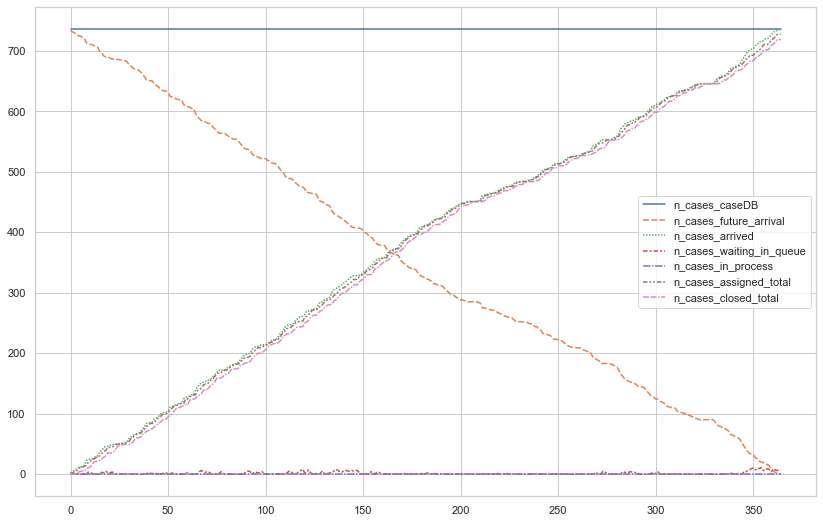

In [8]:
sns.lineplot(data = df[['n_cases_caseDB',
                         'n_cases_future_arrival',
                         'n_cases_arrived',
                         'n_cases_waiting_in_queue',
                         'n_cases_in_process', ################### fix this one
                         'n_cases_assigned_total',
                         'n_cases_closed_total',]])

# Agents

<AxesSubplot:>

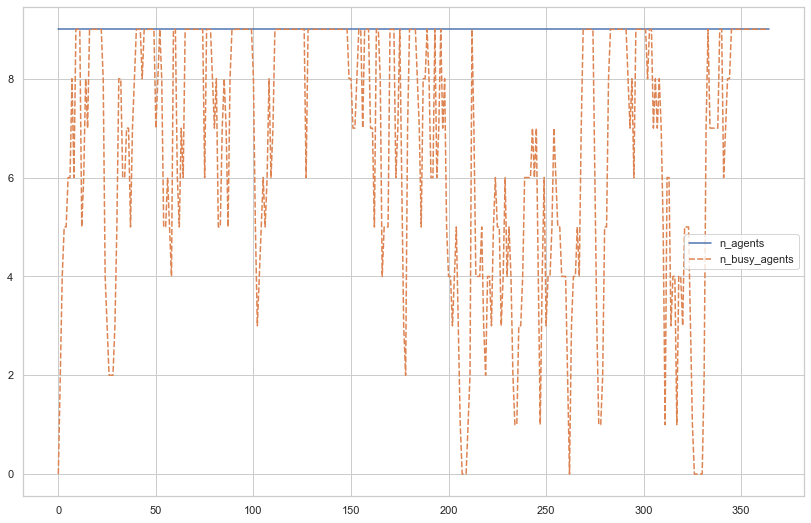

In [9]:
sns.lineplot(data = df[['n_agents',
                         'n_busy_agents',]])

# Queue waiting time

<AxesSubplot:>

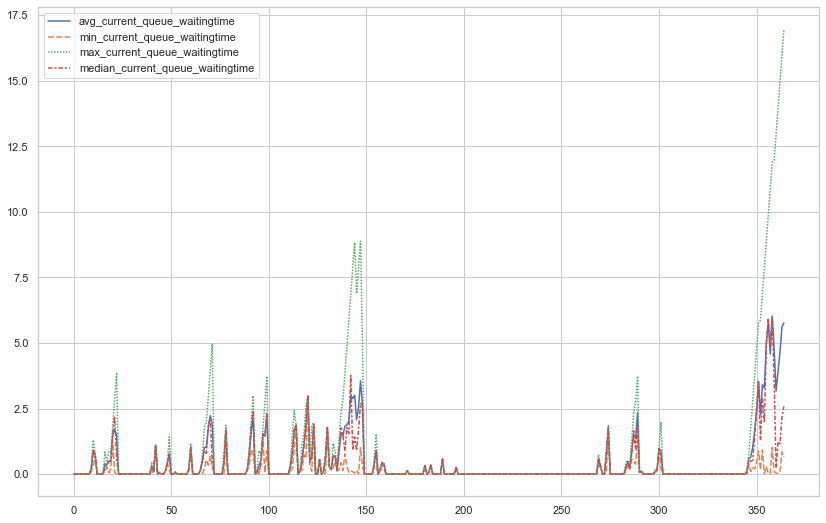

In [10]:
"""
Go over the calculations again - check why mean and median are so similar
"""

sns.lineplot(data = df[['avg_current_queue_waitingtime',
                         'min_current_queue_waitingtime',
                         'max_current_queue_waitingtime',
                         'median_current_queue_waitingtime',]])

# Throughput time

# All runs

In [41]:
runs = []
for i in list(range(0,int(np.max(experiments.RUN)))):
    
    # load a single run
    df = pd.read_csv("../results/"+str(i)+"/"+str(i)+"_timeseries.csv")
    
    # mark it with specs
    specs = experiments.loc[i].to_dict()
    
    df["F_priority_scheme"] = specs["F_priority_scheme"]
    df["F_number_of_agents"] = specs["F_number_of_agents"]
    df["F_hard_ceiling"] = specs["F_hard_ceiling"]
    
    df["repetition"] = specs["repetition"]
    df["RUN"] = specs["RUN"]
    
    # add it to a list
    runs.append(df)
    
all_runs = pd.concat(runs)

all_runs["F_priority_scheme"] = all_runs.F_priority_scheme.astype("category")
all_runs["F_number_of_agents"] = all_runs.F_number_of_agents.astype("category")
all_runs["F_hard_ceiling"] = all_runs.F_hard_ceiling.astype("category")

In [42]:
all_runs

,day,n_cases_caseDB,n_cases_future_arrival,n_cases_arrived,n_cases_waiting_in_queue,n_cases_in_process,n_cases_assigned_total,n_cases_closed_total,n_agents,n_busy_agents,avg_current_queue_waitingtime,min_current_queue_waitingtime,max_current_queue_waitingtime,median_current_queue_waitingtime,burn_in_period,F_priority_scheme,F_number_of_agents,F_hard_ceiling,repetition,RUN
0,0,722,721,1,0,0,0,0,3,0,0.0,0.0,0.0,0.0,False,FCFS,3,NONE,0,0
1,1,722,721,1,0,0,1,0,3,1,0.0,0.0,0.0,0.0,False,FCFS,3,NONE,0,0
2,2,722,721,1,0,0,1,0,3,1,0.0,0.0,0.0,0.0,False,FCFS,3,NONE,0,0
3,3,722,718,4,0,0,1,1,3,0,0.0,0.0,0.0,0.0,False,FCFS,3,NONE,0,0
4,4,722,716,6,0,0,4,1,3,3,0.0,0.0,0.0,0.0,False,FCFS,3,NONE,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,360,699,10,689,0,0,685,683,12,2,0.0,0.0,0.0,0.0,False,LRTF,12,SLA,99,3198
361,361,699,9,690,0,0,689,684,12,5,0.0,0.0,0.0,0.0,False,LRTF,12,SLA,99,3198
362,362,699,7,692,0,0,690,685,12,5,0.0,0.0,0.0,0.0,False,LRTF,12,SLA,99,3198
363,363,699,6,693,0,0,692,688,12,4,0.0,0.0,0.0,0.0,False,LRTF,12,SLA,99,3198


<AxesSubplot:>

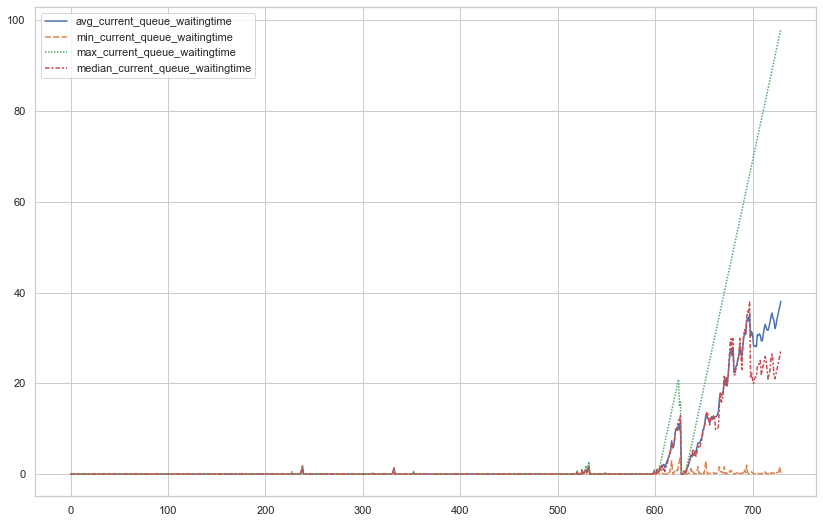

In [32]:
sns.lineplot(data = df[['avg_current_queue_waitingtime',
                         'min_current_queue_waitingtime',
                         'max_current_queue_waitingtime',
                         'median_current_queue_waitingtime',]])

# Notes

- The event-log seems as a reliable source for checking the final performance
- The source for calculating the queue statistics should be reviewed:
    - Is caseDB reliable to use at day d for finding n waiting in the queue?
    
## Mysterious missing cases
- Dates in the event-log seems to make sense, but the arrival_q in CaseDB, and case_arrival in evlog only go to day 355 even though the dates of cases seem to make sense.

What is this phenomena?
- How could the processing time increase?
    - it doesnt
- How could initial_delay increase? (initial_delay = waiting time in queue before case gets picked up)
    - it seems to amount to a year at some point

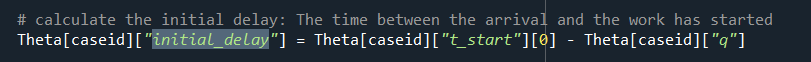

# Initial theory

- The queue gets so filled up, that the current waiting time is close to a year, and no new cases are therefore picked up.
    - This would also imply that we cannot calculate any statistics on new cases, as they are waiting in line.
    
# If true, then:

- Need a way to measure this in an easy-to-understand manner.
    - CaseDB is reliable, but not that intuitive
        - It can be used to figure out what is the size of and waiting time in the queue
    - The event-log has much of the needed information

# Plots of waiting time over two years: FCFS

In [31]:
burn_in = 0

runs = all_runs.loc[all_runs.F_priority_scheme == "FCFS"]

"""
Remove burn_in period
"""
runs = runs.loc[runs.day < 365 + burn_in]
runs = runs.loc[runs.day >= burn_in]

runs["F_priority_scheme"] = runs.F_priority_scheme.astype("category")
runs.index = list(range(0,len(runs)))

runs

,day,n_cases_caseDB,n_cases_future_arrival,n_cases_arrived,n_cases_waiting_in_queue,n_cases_in_process,n_cases_assigned_total,n_cases_closed_total,n_agents,n_busy_agents,avg_current_queue_waitingtime,min_current_queue_waitingtime,max_current_queue_waitingtime,median_current_queue_waitingtime,burn_in_period,F_priority_scheme,F_number_of_agents,F_hard_ceiling,repetition,RUN
0,0,722,721,1,0,0,0,0,3,0,0.0,0.0,0.0,0.0,False,FCFS,3,NONE,0,0
1,1,722,721,1,0,0,1,0,3,1,0.0,0.0,0.0,0.0,False,FCFS,3,NONE,0,0
2,2,722,721,1,0,0,1,0,3,1,0.0,0.0,0.0,0.0,False,FCFS,3,NONE,0,0
3,3,722,718,4,0,0,1,1,3,0,0.0,0.0,0.0,0.0,False,FCFS,3,NONE,0,0
4,4,722,716,6,0,0,4,1,3,3,0.0,0.0,0.0,0.0,False,FCFS,3,NONE,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291995,360,681,4,677,0,0,671,661,12,10,0.0,0.0,0.0,0.0,False,FCFS,12,SLA,99,3196
291996,361,681,4,677,0,0,677,665,12,12,0.0,0.0,0.0,0.0,False,FCFS,12,SLA,99,3196
291997,362,681,2,679,0,0,677,670,12,7,0.0,0.0,0.0,0.0,False,FCFS,12,SLA,99,3196
291998,363,681,0,681,0,0,679,671,12,8,0.0,0.0,0.0,0.0,False,FCFS,12,SLA,99,3196


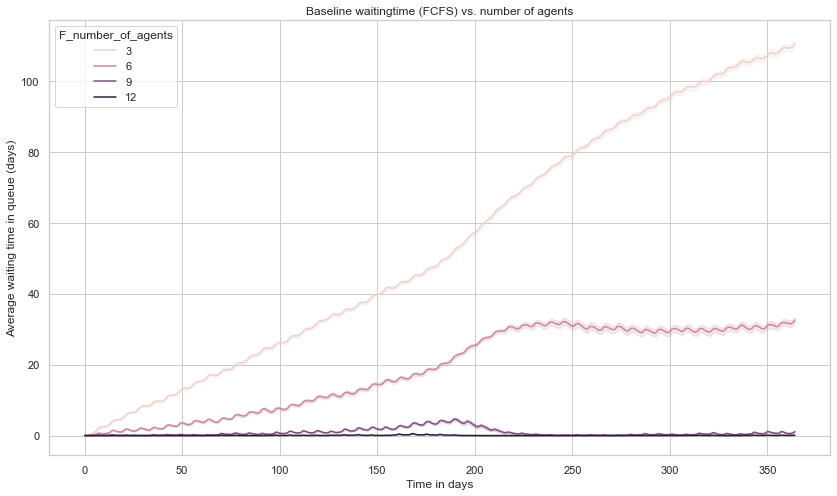

In [20]:
fig = plt.figure(figsize=(14, 8))

sns.lineplot(x = 'day', 
             y = 'avg_current_queue_waitingtime', 
             hue = "F_number_of_agents",
             ci=95,
             data=runs)

plt.ylabel("Average waiting time in queue (days)")
plt.xlabel("Time in days")

plt.title("Baseline waitingtime (FCFS) vs. number of agents")

#plt.ylim(0, 150)

plt.savefig("Waiting_time_FCFS.png", dpi=200, bbox_inches = "tight")

plt.show()

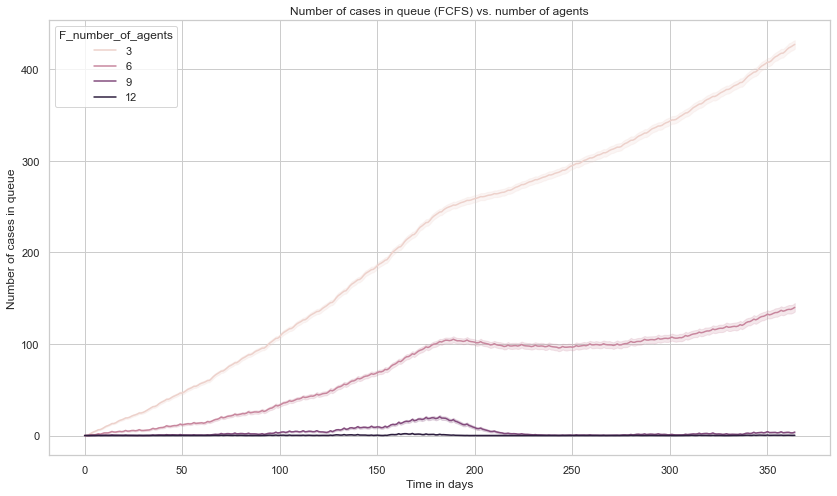

In [21]:
fig = plt.figure(figsize=(14, 8))

sns.lineplot(x = 'day', 
             y = 'n_cases_waiting_in_queue', 
             hue = "F_number_of_agents",
             ci=95,
             data=runs)

plt.ylabel("Number of cases in queue")
plt.xlabel("Time in days")

plt.title("Number of cases in queue (FCFS) vs. number of agents")

#plt.ylim(0, 150)

plt.savefig("n_cases_waiting_in_queue_FCFS.png", dpi=200, bbox_inches = "tight")

plt.show()

In [40]:
all_runs.loc[all_runs.F_hard_ceiling != "NONE"]

,day,n_cases_caseDB,n_cases_future_arrival,n_cases_arrived,n_cases_waiting_in_queue,n_cases_in_process,n_cases_assigned_total,n_cases_closed_total,n_agents,n_busy_agents,avg_current_queue_waitingtime,min_current_queue_waitingtime,max_current_queue_waitingtime,median_current_queue_waitingtime,burn_in_period,F_priority_scheme,F_number_of_agents,F_hard_ceiling,repetition,RUN
0,0,722,721,1,0,0,0,0,3,0,0.0,0.0,0.0,0.0,False,FCFS,FCFS,FCFS,0,0
1,1,722,721,1,0,0,1,0,3,1,0.0,0.0,0.0,0.0,False,FCFS,FCFS,FCFS,0,0
2,2,722,721,1,0,0,1,0,3,1,0.0,0.0,0.0,0.0,False,FCFS,FCFS,FCFS,0,0
3,3,722,718,4,0,0,1,1,3,0,0.0,0.0,0.0,0.0,False,FCFS,FCFS,FCFS,0,0
4,4,722,716,6,0,0,4,1,3,3,0.0,0.0,0.0,0.0,False,FCFS,FCFS,FCFS,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,360,699,10,689,0,0,685,683,12,2,0.0,0.0,0.0,0.0,False,LRTF,LRTF,LRTF,99,3198
361,361,699,9,690,0,0,689,684,12,5,0.0,0.0,0.0,0.0,False,LRTF,LRTF,LRTF,99,3198
362,362,699,7,692,0,0,690,685,12,5,0.0,0.0,0.0,0.0,False,LRTF,LRTF,LRTF,99,3198
363,363,699,6,693,0,0,692,688,12,4,0.0,0.0,0.0,0.0,False,LRTF,LRTF,LRTF,99,3198


In [ ]:
response = "avg_current_queue_waitingtime"

fig, ax = plt.subplots(
    nrows=2,
    ncols=1, figsize=(16, 12))

st = fig.suptitle("Title", fontsize="x-large")

""" divide to two plots"""


hue_order = ["FCFS","SRTF","LRTF","NPS"]

NONE = all_runs.loc[all_runs.F_hard_ceiling == "NONE"]

sns.lineplot(x = NONE.day, 
             y = NONE[response], 
             hue = NONE.F_priority_scheme,
             ci=95,
             ax=ax[0])

SLA = all_runs.loc[all_runs.F_hard_ceiling == "SLA"]

sns.lineplot(x = SLA.day, 
             y = SLA[response], 
             hue = SLA.F_priority_scheme,
             ci=95,
             ax=ax[1])

#fig.title("Simulated tNPS performance (after case completion)")

ax[0].set(ylabel=response, xlabel='No hard ceiling')#, ylim=[-93,-83])
ax[0].legend([],[], frameon=False)

ax[1].set(ylabel=response, xlabel='Hard ceiling = 2.5 days')#, ylim=[-93,-83])
ax[1].legend(loc='lower right')


# Plots of waiting time over two years: All schemes

In [24]:
#runs = all_runs.loc[all_runs.repetition == 0]

runs = all_runs.loc[all_runs.F_number_of_agents == 3]

#runs = runs.loc[runs.day < 365]
runs["F_priority_scheme"] = runs.F_priority_scheme.astype("category")
runs.index = list(range(0,len(runs)))

runs

C:\Users\Mike\AppData\Local\Temp\ipykernel_19916\3084550090.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs["F_priority_scheme"] = runs.F_priority_scheme.astype("category")


,day,n_cases_caseDB,n_cases_future_arrival,n_cases_arrived,n_cases_waiting_in_queue,n_cases_in_process,n_cases_assigned_total,n_cases_closed_total,n_agents,n_busy_agents,avg_current_queue_waitingtime,min_current_queue_waitingtime,max_current_queue_waitingtime,median_current_queue_waitingtime,burn_in_period,F_priority_scheme,F_number_of_agents,repetition,RUN
0,0,788,787,1,0,0,0,0,6,0,0.000000,0.000000,0.000000,0.000000,False,FCFS,6,0,4
1,1,788,787,1,0,0,1,0,6,1,0.000000,0.000000,0.000000,0.000000,False,FCFS,6,0,4
2,2,788,785,3,0,0,1,0,6,1,0.000000,0.000000,0.000000,0.000000,False,FCFS,6,0,4
3,3,788,783,5,0,0,3,1,6,2,0.000000,0.000000,0.000000,0.000000,False,FCFS,6,0,4
4,4,788,781,7,0,0,5,2,6,3,0.000000,0.000000,0.000000,0.000000,False,FCFS,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291995,360,725,8,717,127,0,586,580,6,6,32.912064,0.063194,68.931276,31.884980,False,NPS,6,99,3191
291996,361,725,4,721,129,0,588,582,6,6,32.330356,0.204195,68.449267,29.571986,False,NPS,6,99,3191
291997,362,725,2,723,130,0,591,585,6,6,31.496969,0.097450,68.388957,28.268040,False,NPS,6,99,3191
291998,363,725,1,724,131,0,592,586,6,6,31.721803,0.039734,68.772127,27.152348,False,NPS,6,99,3191


[(0.0, 275.0)]

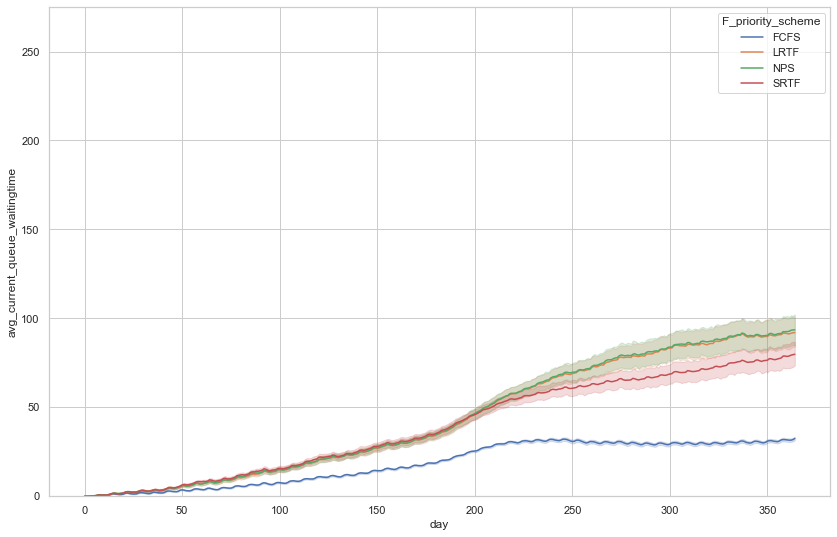

In [25]:
ax = sns.lineplot(x = 'day', 
             y = 'avg_current_queue_waitingtime', 
             hue = "F_priority_scheme",
             ci=95,
             data=runs)

ax.set(ylim=(0, 275))

In [37]:
#runs = all_runs.loc[all_runs.repetition == 0]

runs = all_runs.loc[all_runs.F_number_of_agents == 6]

#runs = runs.loc[runs.day < 365]
runs["F_priority_scheme"] = runs.F_priority_scheme.astype("category")
runs.index = list(range(0,len(runs)))

runs

C:\Users\Mike\AppData\Local\Temp\ipykernel_22128\3084550090.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs["F_priority_scheme"] = runs.F_priority_scheme.astype("category")


,day,n_cases_caseDB,n_cases_future_arrival,n_cases_arrived,n_cases_waiting_in_queue,n_cases_in_process,n_cases_assigned_total,n_cases_closed_total,n_agents,n_busy_agents,avg_current_queue_waitingtime,min_current_queue_waitingtime,max_current_queue_waitingtime,median_current_queue_waitingtime,burn_in_period,F_priority_scheme,F_number_of_agents,repetition,RUN
0,0,1519,1516,3,0,0,0,0,6,0,0.000000,0.000000,0.000000,0.000000,True,FCFS,6,0,5
1,1,1519,1514,5,0,0,3,0,6,3,0.000000,0.000000,0.000000,0.000000,True,FCFS,6,0,5
2,2,1519,1512,7,0,0,5,0,6,5,0.000000,0.000000,0.000000,0.000000,True,FCFS,6,0,5
3,3,1519,1510,9,0,0,7,3,6,4,0.000000,0.000000,0.000000,0.000000,True,FCFS,6,0,5
4,4,1519,1510,9,0,0,9,4,6,5,0.000000,0.000000,0.000000,0.000000,True,FCFS,6,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364995,725,1664,26,1638,510,0,1127,1121,6,6,66.901162,0.095077,140.630474,61.852222,False,NPS-SLA,6,99,1989
364996,726,1664,26,1638,507,0,1131,1125,6,6,67.190665,0.774153,140.260038,61.787665,False,NPS-SLA,6,99,1989
364997,727,1664,22,1642,507,0,1131,1125,6,6,68.190665,1.774153,141.260038,62.787665,False,NPS-SLA,6,99,1989
364998,728,1664,12,1652,511,0,1131,1125,6,6,68.653546,0.337115,142.260038,62.525969,False,NPS-SLA,6,99,1989


[(0.0, 275.0)]

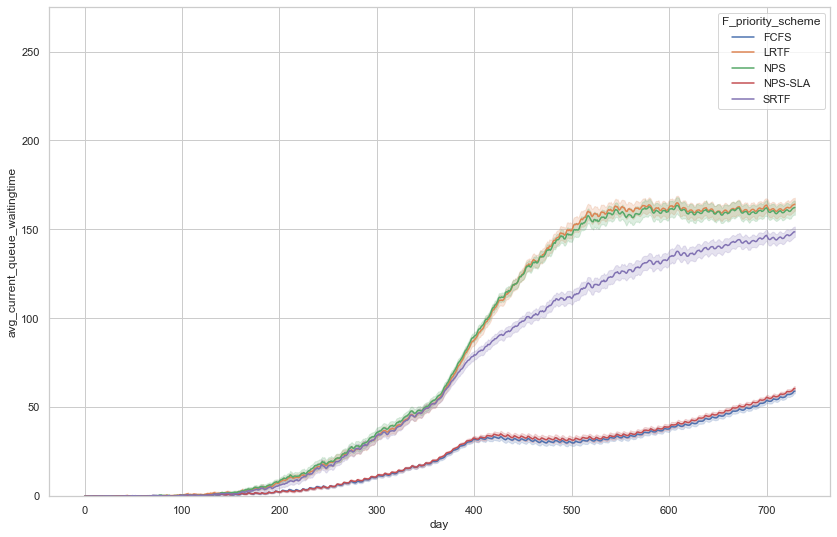

In [38]:
ax = sns.lineplot(x = 'day', 
             y = 'avg_current_queue_waitingtime', 
             hue = "F_priority_scheme",
             ci=95,
             data=runs)

ax.set(ylim=(0, 275))

In [39]:
#runs = all_runs.loc[all_runs.repetition == 0]

runs = all_runs.loc[all_runs.F_number_of_agents == 9]

#runs = runs.loc[runs.day < 365]
runs["F_priority_scheme"] = runs.F_priority_scheme.astype("category")
runs.index = list(range(0,len(runs)))

runs

C:\Users\Mike\AppData\Local\Temp\ipykernel_22128\3821699410.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs["F_priority_scheme"] = runs.F_priority_scheme.astype("category")


,day,n_cases_caseDB,n_cases_future_arrival,n_cases_arrived,n_cases_waiting_in_queue,n_cases_in_process,n_cases_assigned_total,n_cases_closed_total,n_agents,n_busy_agents,avg_current_queue_waitingtime,min_current_queue_waitingtime,max_current_queue_waitingtime,median_current_queue_waitingtime,burn_in_period,F_priority_scheme,F_number_of_agents,repetition,RUN
0,0,1507,1504,3,0,0,0,0,9,0,0.000000,0.000000,0.000000,0.000000,True,FCFS,9,0,10
1,1,1507,1503,4,0,0,3,0,9,3,0.000000,0.000000,0.000000,0.000000,True,FCFS,9,0,10
2,2,1507,1502,5,0,0,4,0,9,4,0.000000,0.000000,0.000000,0.000000,True,FCFS,9,0,10
3,3,1507,1500,7,0,0,5,3,9,2,0.000000,0.000000,0.000000,0.000000,True,FCFS,9,0,10
4,4,1507,1499,8,0,0,7,3,9,4,0.000000,0.000000,0.000000,0.000000,True,FCFS,9,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364995,725,1558,13,1545,178,0,1365,1356,9,9,19.500408,0.353250,43.001908,20.041151,False,NPS-SLA,9,99,1994
364996,726,1558,8,1550,177,0,1368,1359,9,9,19.882786,0.551160,43.253314,20.667526,False,NPS-SLA,9,99,1994
364997,727,1558,7,1551,180,0,1370,1361,9,9,20.065302,0.379841,42.682689,20.562094,False,NPS-SLA,9,99,1994
364998,728,1558,7,1551,181,0,1370,1361,9,9,20.952537,0.654820,43.682689,21.391319,False,NPS-SLA,9,99,1994


[(0.0, 275.0)]

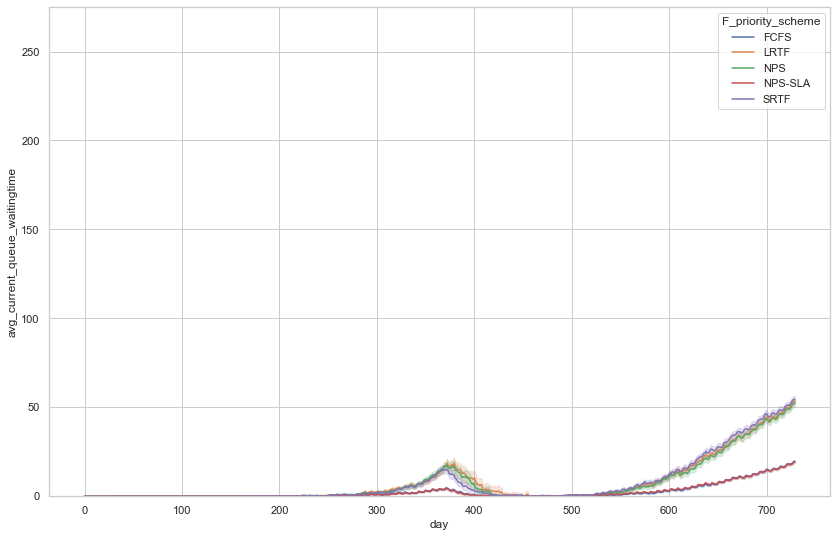

In [40]:
ax = sns.lineplot(x = 'day', 
             y = 'avg_current_queue_waitingtime', 
             hue = "F_priority_scheme",
             ci=95,
             data=runs)

ax.set(ylim=(0, 275))

In [41]:
#runs = all_runs.loc[all_runs.repetition == 0]

runs = all_runs.loc[all_runs.F_number_of_agents == 12]

#runs = runs.loc[runs.day < 365]
runs["F_priority_scheme"] = runs.F_priority_scheme.astype("category")
runs.index = list(range(0,len(runs)))

runs

C:\Users\Mike\AppData\Local\Temp\ipykernel_22128\393354896.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs["F_priority_scheme"] = runs.F_priority_scheme.astype("category")


,day,n_cases_caseDB,n_cases_future_arrival,n_cases_arrived,n_cases_waiting_in_queue,n_cases_in_process,n_cases_assigned_total,n_cases_closed_total,n_agents,n_busy_agents,avg_current_queue_waitingtime,min_current_queue_waitingtime,max_current_queue_waitingtime,median_current_queue_waitingtime,burn_in_period,F_priority_scheme,F_number_of_agents,repetition,RUN
0,0,1621,1618,3,0,0,0,0,12,0,0.000000,0.000000,0.000000,0.000000,True,FCFS,12,0,15
1,1,1621,1614,7,0,0,3,0,12,3,0.000000,0.000000,0.000000,0.000000,True,FCFS,12,0,15
2,2,1621,1612,9,1,0,7,0,12,7,0.009496,0.009496,0.009496,0.009496,True,FCFS,12,0,15
3,3,1621,1610,11,0,0,9,3,12,6,0.000000,0.000000,0.000000,0.000000,True,FCFS,12,0,15
4,4,1621,1610,11,0,0,11,5,12,6,0.000000,0.000000,0.000000,0.000000,True,FCFS,12,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364265,725,1543,11,1532,77,0,1454,1442,12,12,33.982260,0.301212,93.992168,22.985828,False,NPS,12,99,1998
364266,726,1543,10,1533,77,0,1455,1443,12,12,34.969881,0.348081,94.992168,23.985828,False,NPS,12,99,1998
364267,727,1543,10,1533,77,0,1456,1444,12,12,35.947199,0.580904,95.992168,24.985828,False,NPS,12,99,1998
364268,728,1543,5,1538,77,0,1456,1444,12,12,36.947199,1.580904,96.992168,25.985828,False,NPS,12,99,1998


[(0.0, 275.0)]

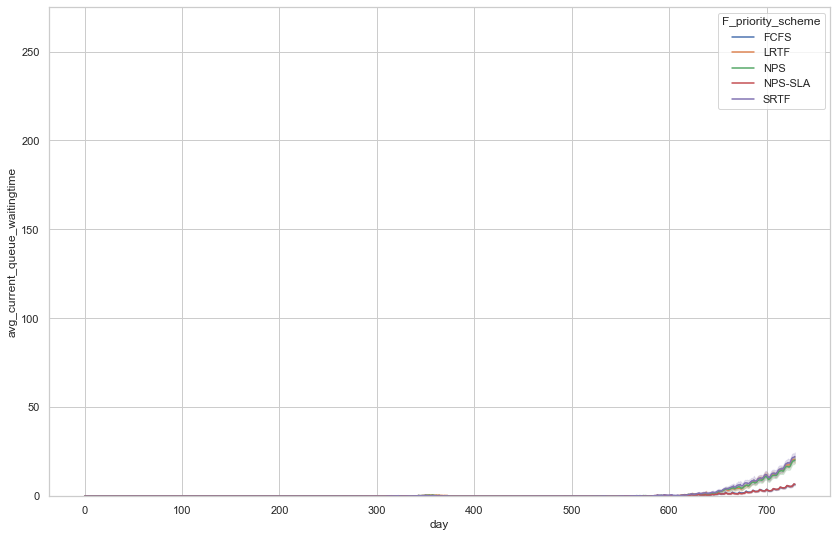

In [42]:
ax = sns.lineplot(x = 'day', 
             y = 'avg_current_queue_waitingtime', 
             hue = "F_priority_scheme",
             ci=95,
             data=runs)

ax.set(ylim=(0, 275))